In [15]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import find_dotenv, load_dotenv
dotenv_filepath = find_dotenv()
load_dotenv(dotenv_filepath)
project_path = os.path.dirname(dotenv_filepath)

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(project_path)
sys.path.append(src_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
plt.style.use("ggplot")

In [189]:
 # import project methods
%aimport src.datasets
from src.datasets import get_disease_data, load_clinical_data

In [190]:
DISEASE = "fanconi"
SEED = 42

In [192]:
X, Y, circuits, genes, clinical = get_disease_data("fanconi")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=SEED)

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [9]:
model = GaussianProcessRegressor()

In [10]:
model.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [11]:
Y_train_hat = model.predict(X_train)
Y_test_hat = model.predict(X_test)

In [12]:
from sklearn import metrics

In [18]:
metrics.r2_score(Y_train, Y_train_hat), metrics.r2_score(Y_test, Y_test_hat)

(1.0, 0.8272547232620832)

In [13]:
r2_test = metrics.r2_score(Y_test, Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

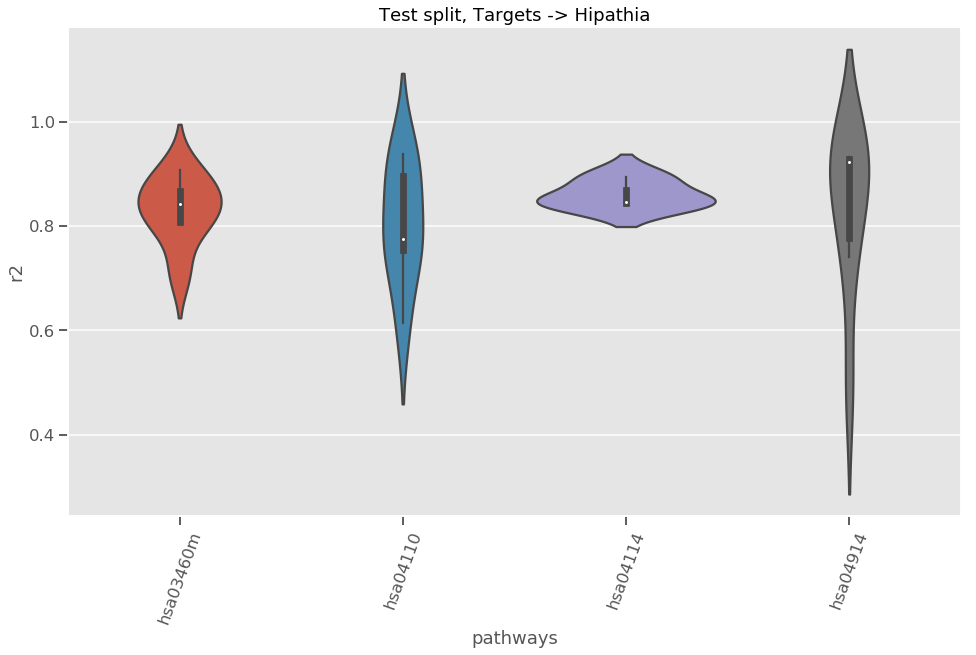

In [22]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test, ax=ax);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cvs = cross_val_score(model, X, Y, cv=10, n_jobs=-1)

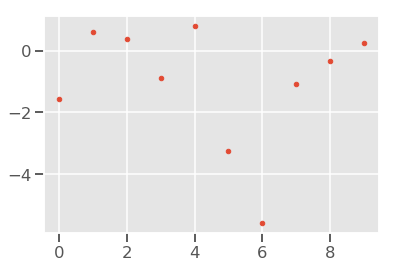

In [21]:
plt.plot(cvs, ".")

In [25]:
rf_path = "/run/user/1001/gvfs/sftp:host=gattaca1,user=cloucera/mnt/lustre/scratch/home/cloucera/projects/hord/review_march_2019/rf/fanconi/02/hypmorf_fanconi_02_from_targets_to_pathways.pkl"

In [24]:
from sklearn.externals import joblib

In [28]:
with open(rf_path, "rb") as f:
    model = joblib.load(f)

/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estim

In [29]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=0.49908966122853904, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=302, n_jobs=24,
           oob_score=False, random_state=0, verbose=False,
           warm_start=False)

In [30]:
Y_train_hat = model.predict(X_train)
Y_test_hat = model.predict(X_test)

In [31]:
metrics.r2_score(Y_train, Y_train_hat), metrics.r2_score(Y_test, Y_test_hat)

(1.0, 0.8271510628263744)

In [32]:
r2_test = metrics.r2_score(Y_test, Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

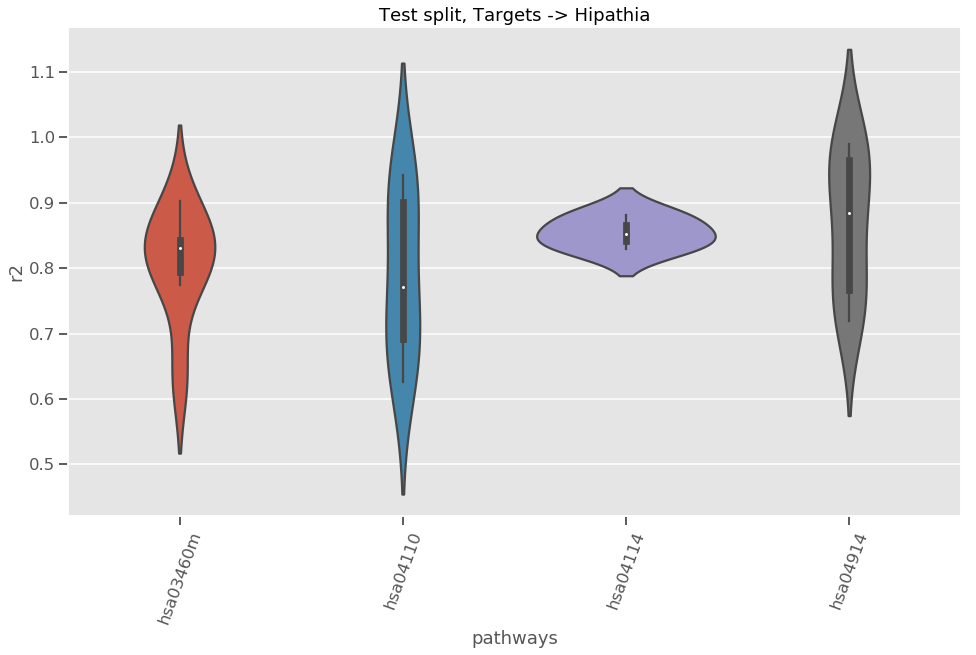

In [33]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test, ax=ax);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [34]:
X.shape

(11688, 965)

In [36]:
genes.head()

,in_hipathia,approved_targets,arthr_infl_targets,JIA_targets,infl_targets
index,,,,,
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
9,False,False,False,False,False
10,False,False,False,False,False


In [37]:
genes.in_hipathia.sum()

3235

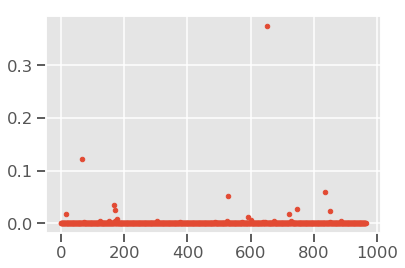

In [38]:
plt.plot(rf.feature_importances_, ".")

In [39]:
from src.learn import plot_feature_importances

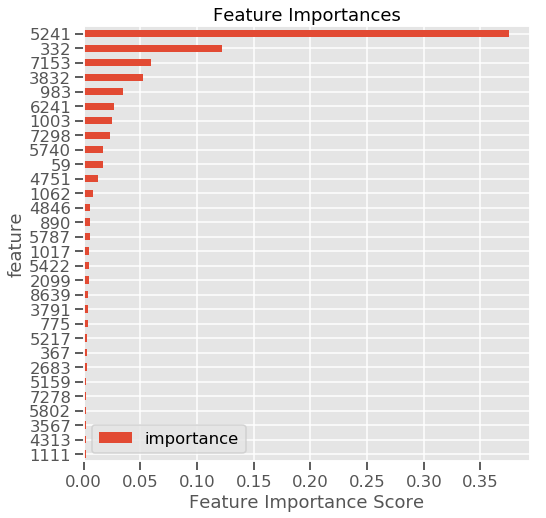

,importance
feature,
1111,0.001671
4313,0.001844
3567,0.001899
5802,0.002141
7278,0.002143
5159,0.002387
2683,0.002616
367,0.003088
5217,0.003091


In [40]:
imp = plot_feature_importances(X_train=X_train, clf=model, top_n=30)

In [41]:
cvs_rf = cross_val_score(rf, X, Y, cv=10, n_jobs=-1)

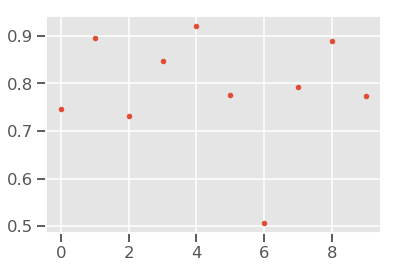

In [42]:
plt.plot(cvs_rf, ".")

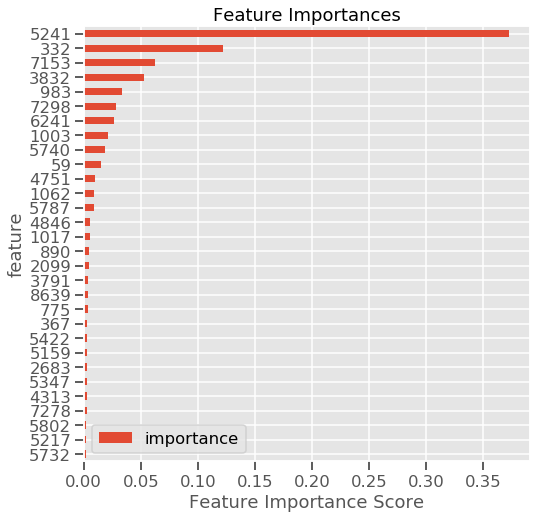

In [45]:
rf.fit(X, Y)
imp = plot_feature_importances(X_train=X, clf=rf, top_n=30)

In [49]:
base_model_dir = os.path.join("/run/user/1001/gvfs/sftp:host=gattaca1,user=cloucera/mnt/lustre/scratch/home/cloucera/projects/hord/review_march_2019/rf/fanconi/02")
global_fname = "hypmorf_fanconi_02_from_targets_to_pathways_global_relevance.tsv"
gobal_path = os.path.join(base_model_dir, global_fname)

In [72]:
global_rel = pd.read_csv(gobal_path, sep="\t", index_col=0)
global_rel.index = global_rel.index.astype(str)
global_rel.head()

,relevance
15,0.000084
18,0.000398
19,0.000151
25,0.000267
27,0.000110


In [73]:
global_rel.sort_values(by="relevance", ascending=False)

,relevance
5241,0.374816
332,0.121412
7153,0.060072
3832,0.051647
983,0.034030
1003,0.025979
6241,0.025888
7298,0.023322
5740,0.017458
59,0.017074


In [52]:
genes.loc[imp.index, :]

,in_hipathia,approved_targets,arthr_infl_targets,JIA_targets,infl_targets
feature,,,,,
5732,True,True,False,False,False
5217,True,True,False,False,False
5802,False,True,False,False,False
7278,True,True,False,False,False
4313,True,True,False,False,False
5347,True,True,False,False,False
2683,False,True,False,False,False
5159,True,True,False,False,False
5422,False,True,False,False,False


In [74]:
class dummy(object):
    pass

clf = dummy()
clf.feature_importances_ = global_rel.relevance[X_train.columns].values.ravel()

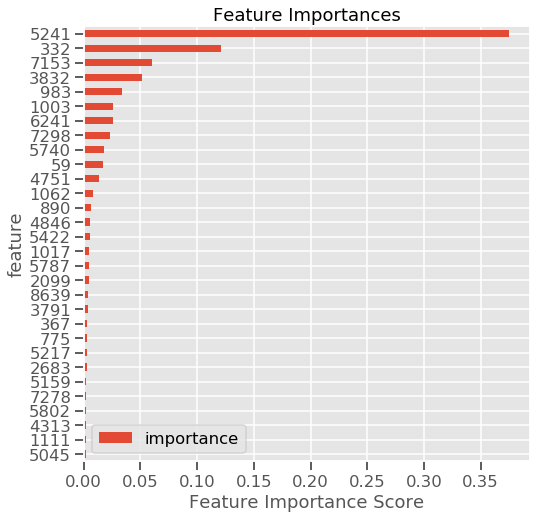

In [76]:
imp = plot_feature_importances(X_train=X_train, clf=clf, top_n=30)

In [77]:
genes.loc[imp.index, :]

,in_hipathia,approved_targets,arthr_infl_targets,JIA_targets,infl_targets
feature,,,,,
5045,False,True,False,False,False
1111,True,True,False,False,False
4313,True,True,False,False,False
5802,False,True,False,False,False
7278,True,True,False,False,False
5159,True,True,False,False,False
2683,False,True,False,False,False
5217,True,True,False,False,False
775,True,True,False,False,False


In [69]:
global_rel.shape

(965, 1)

In [70]:
X_train.shape

(8766, 965)

In [193]:
def perform_cv(X, y, estimator, seed, tissue):
    from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
    from sklearn import metrics
    from collections import defaultdict
    
    stats = {
        "evs_mo":{"train": [], "test": []},
        "evs_ua":{"train": [], "test": []},
        "mae_mo":{"train": [], "test": []},
        "mae_ua":{"train": [], "test": []},
        "mse_mo":{"train": [], "test": []},
        "mse_ua":{"train": [], "test": []},
        "msle_mo":{"train": [], "test": []},
        "msle_ua":{"train": [], "test": []},
        "r2_mo":{"train": [], "test": []},
        "r2_ua":{"train": [], "test": []},
    }
    
    skf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
    for train_index, test_index in skf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]

        estimator.fit(X_train, y_train)

        y_train_hat = estimator.predict(X_train)
        y_test_hat = estimator.predict(X_test)

        # metrics computation
        
        # Explained variance
        
        evs_mo_train = metrics.explained_variance_score(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["evs_mo"]["train"].append(evs_mo_train)

        evs_mo_test = metrics.explained_variance_score(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["evs_mo"]["test"].append(evs_mo_test)

        evs_ua_train = metrics.explained_variance_score(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["evs_ua"]["train"].append(evs_ua_train)

        evs_ua_test = metrics.explained_variance_score(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["evs_ua"]["test"].append(evs_ua_test)
        
        # MAE
        
        mae_mo_train = metrics.mean_absolute_error(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["mae_mo"]["train"].append(mae_mo_train)

        mae_mo_test = metrics.mean_absolute_error(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["mae_mo"]["test"].append(mae_mo_test)

        mae_ua_train = metrics.mean_absolute_error(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["mae_ua"]["train"].append(mae_ua_train)

        mae_ua_test = metrics.mean_absolute_error(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["mae_ua"]["test"].append(mae_ua_test)
        
        # MSE
        
        mse_mo_train = metrics.mean_squared_error(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["mse_mo"]["train"].append(mse_mo_train)

        mse_mo_test = metrics.mean_squared_error(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["mse_mo"]["test"].append(mse_mo_test)

        mse_ua_train = metrics.mean_squared_error(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["mse_ua"]["train"].append(mse_ua_train)

        mse_ua_test = metrics.mean_squared_error(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["mse_ua"]["test"].append(mse_ua_test)
        
        # MSLE
        
        msle_mo_train = metrics.mean_squared_log_error(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["msle_mo"]["train"].append(msle_mo_train)

        msle_mo_test = metrics.mean_squared_log_error(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["msle_mo"]["test"].append(msle_mo_test)

        msle_ua_train = metrics.mean_squared_log_error(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["msle_ua"]["train"].append(msle_ua_train)

        msle_ua_test = metrics.mean_squared_log_error(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["msle_ua"]["test"].append(msle_ua_test)
        
        # r2
        
        r2_mo_train = metrics.r2_score(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["r2_mo"]["train"].append(r2_mo_train)

        r2_mo_test = metrics.r2_score(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["r2_mo"]["test"].append(r2_mo_test)

        r2_ua_train = metrics.r2_score(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["r2_ua"]["train"].append(r2_ua_train)

        r2_ua_test = metrics.r2_score(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["r2_ua"]["test"].append(r2_ua_test)
        
    return stats

In [194]:
from sklearn.dummy import DummyRegressor

In [195]:
cv_stats = perform_cv(X, Y, estimator=DummyRegressor(), seed=42, tissue=clinical.tissue)

In [196]:
from sklearn.externals import joblib

In [197]:
joblib.dump(cv_stats, open("dict.pkl", "wb"))

In [198]:
cv_stats_loaded = joblib.load(open("dict.pkl", "rb"))

In [387]:
%autoreload 2
from src.learn import BoMorf

In [388]:
model = BoMorf("hyperopt_automorf", framework="hyperopt", n_jobs=-1, cv=2, n_calls=10, out="./out")

In [389]:
model.fit(X.iloc[1:100, :], Y.iloc[1:100, :])

100%|██████████| 1/1 [00:01<00:00,  1.36s/it, best loss: 0.008351965499095448]


In [390]:
model.score(X, Y)

0.1800736666081594

In [391]:
model.save(out="./out")

In [392]:
model_loaded = BoMorf.load(name="hyperopt_automorf", out="./out")

In [393]:
model

BoMorf(copy_X_train=(True,), cv=2, framework='hyperopt', n_calls=10,
    n_jobs=-1, name='hyperopt_automorf', out=PosixPath('out'),
    random_state=42)

In [394]:
model_loaded

BoMorf(copy_X_train=((True,),), cv=2, framework='hyperopt', n_calls=10,
    n_jobs=-1, name='hyperopt_automorf', out=PosixPath('out'),
    random_state=42)

In [395]:
model_loaded.score(X, Y)

0.18007366660815954

In [396]:
!ls out

hyperopt_automorf_estimator.pkl  sko_automorf_opt.pkl
hyperopt_automorf_opt.pkl


In [397]:
model.X_train_

array([[0.12888154, 0.31063544, 0.40327909, ..., 0.28617353, 0.46278271,
        0.29319248],
       [0.04239911, 0.27303573, 0.40084364, ..., 0.32380694, 0.48202143,
        0.21378607],
       [0.10536843, 0.30422671, 0.39459946, ..., 0.30129932, 0.49001099,
        0.13921703],
       ...,
       [0.09552318, 0.29202336, 0.41093215, ..., 0.30037057, 0.47593304,
        0.12568674],
       [0.06769825, 0.29522255, 0.42127482, ..., 0.28999939, 0.43507626,
        0.21244335],
       [0.1050717 , 0.26258939, 0.46102074, ..., 0.29183235, 0.49928945,
        0.12745424]])

In [400]:
X.corr().head()

,15,18,19,25,27,28,30,32,34,43,...,51727,51762,54205,57016,63036,79090,118429,140465,203068,729230
15,1.000000,0.303226,-0.250703,-0.446815,-0.129653,0.093772,0.096895,-0.310239,-0.271515,0.235088,...,-0.500658,0.097388,-0.139781,-0.144675,0.020333,0.179950,-0.442639,0.116214,-0.242410,0.093902
18,0.303226,1.000000,-0.257012,-0.401492,-0.026744,-0.105135,0.301900,-0.180313,0.061340,0.339597,...,-0.129874,-0.175888,0.052344,-0.249140,0.165726,0.020707,-0.526437,0.212029,-0.285900,-0.278311
19,-0.250703,-0.257012,1.000000,0.373894,0.275395,0.119114,-0.009325,0.428977,-0.111547,-0.337238,...,0.210243,0.149522,-0.202949,0.143219,-0.078072,-0.047247,0.567101,-0.283206,-0.029445,0.260124
25,-0.446815,-0.401492,0.373894,1.000000,0.366886,0.086677,-0.514742,0.306708,-0.073186,-0.339509,...,0.377661,0.057954,-0.077518,0.081405,-0.119570,-0.284786,0.613210,-0.248444,0.278294,-0.046443
27,-0.129653,-0.026744,0.275395,0.366886,1.000000,-0.252892,-0.379271,-0.024736,-0.258813,-0.216545,...,0.126231,0.287966,-0.111484,-0.247129,-0.019720,-0.458714,0.115625,-0.037031,0.232354,-0.268582


In [401]:
x_c = X.corr()

In [402]:
x_c_5241 = x_c["5241"]

In [412]:
",".join(x_c_5241[x_c_5241.abs() > 0.7].index.tolist())

'59,1909,5139,5241,5740,8654'

In [409]:
X.shape

(11688, 965)

In [410]:
Y.shape

(11688, 25)